In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
!git clone https://github.com/Shubham7766/face_mask.git

Cloning into 'face_mask'...
remote: Enumerating objects: 1121, done.
remote: Counting objects: 100% (1121/1121), done.
remote: Compressing objects: 100% (1119/1119), done.
remote: Total 1121 (delta 3), reused 1116 (delta 1), pack-reused 0
Receiving objects: 100% (1121/1121), 37.26 MiB | 16.67 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
! ls

drive  face_mask  sample_data


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
os.listdir('/content/face_mask/data/Train/with mask')

['141-with-mask.jpg',
 '408-with-mask.jpg',
 '186-with-mask.jpg',
 '124-with-mask.jpg',
 '84-with-mask.jpg',
 '474-with-mask.jpg',
 '148-with-mask.jpg',
 '333-with-mask.jpg',
 '203-with-mask.jpg',
 '349-with-mask.jpg',
 '429-with-mask.jpg',
 '227-with-mask.jpg',
 '387-with-mask.jpg',
 '109-with-mask.jpg',
 '281-with-mask.jpg',
 '51-with-mask.jpg',
 'augmented_image_17.jpg',
 '19-with-mask.jpg',
 '96-with-mask.jpg',
 '243-with-mask.jpg',
 '307-with-mask.jpg',
 '71-with-mask.jpg',
 '218-with-mask.jpg',
 '114-with-mask.jpg',
 '239-with-mask.jpg',
 'augmented_image_54.jpg',
 '160-with-mask.jpg',
 '432-with-mask.jpg',
 '53-with-mask.jpg',
 '279-with-mask.jpg',
 '392-with-mask.jpg',
 '456-with-mask.jpg',
 '46-with-mask.jpg',
 '378-with-mask.jpg',
 'augmented_image_81.jpg',
 '309-with-mask.jpg',
 '332-with-mask.jpg',
 '172-with-mask.jpg',
 'augmented_image_47.jpg',
 '382-with-mask.jpg',
 '171-with-mask.jpg',
 '334-with-mask.jpg',
 '471-with-mask.jpg',
 '78-with-mask.jpg',
 '153-with-mask.jpg'

In [ ]:
image_path =  '/content/face_mask/data/Train/with mask/1-with-mask.jpg'
image_matrix = cv2.imread(image_path)
image_matrix.shape

(350, 525, 3)

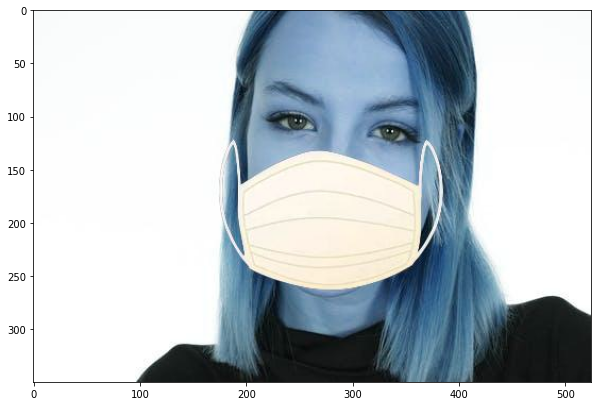

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(image_matrix)
plt.show()

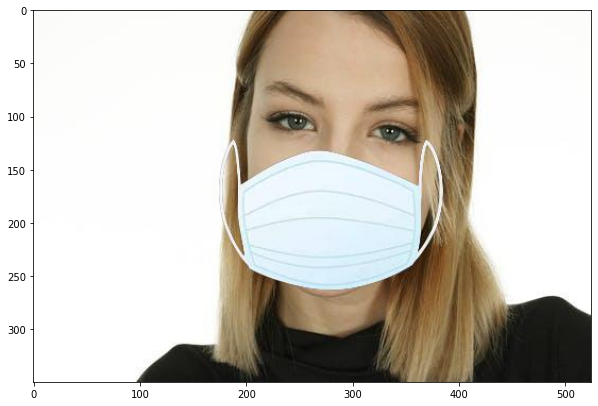

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(image_matrix,cv2.COLOR_RGB2BGR))
plt.show()

In [ ]:
# 32 feature detectors with 3*3 dimensions so the convolution layer compose of 32 feature maps
# 128 by 128 dimensions with colored image(3 channels)  (tensorflow backend)
input_size = (128, 128)
model.add(tf.keras.layers.Convolution2D(32, 3, 3, input_shape = (*input_size, 3), activation = 'relu'))

In [ ]:
# reduce the size of feature maps and therefore reduce the number of nodes in the future fully connected layer (reduce time complexity, less compute intense without losing the performace). 2 by 2 deminsion is the recommended option
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

In [ ]:
model.add(tf.keras.layers.Convolution2D(32, 3, 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# flatten all the feature maps in the pooling layer into single vector
model.add(tf.keras.layers.Flatten())

In [ ]:
# making classic ann which compose of fully connected layers
# number of nodes in hidden layer (output_dim) (common practice is to take the power of 2)
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
 #image augmentation technique to enrich our dataset(training set) without adding more images so get good performance  results with little or no overfitting even with the small amount of images
# used from keras documentation (flow_from_directory method)

from keras.preprocessing.image import ImageDataGenerator
batch_size = 32
# image augmentation part
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# create training set
# wanna get higher accuracy -> inccrease target_size
training_set = train_datagen.flow_from_directory('/content/face_mask/data/Train',
                                                 target_size = input_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

# create test set
# wanna get higher accuracy -> inccrease target_size
test_set = test_datagen.flow_from_directory('/content/face_mask/data/Test',
                                            target_size = input_size,
                                            batch_size = batch_size,
                                            class_mode = 'binary')

# fit the cnn model to the trainig set and testing it on the test set
model.fit(training_set,
          steps_per_epoch = 1000/batch_size,
          epochs = 35,
          validation_data = test_set,
          validation_steps = 200/batch_size)

Found 1040 images belonging to 2 classes.
Found 216 images belonging to 2 classes.
Epoch 1/35
31/31 [==============================] - 15s 220ms/step - loss: 0.6541 - accuracy: 0.6045 - val_loss: 0.5854 - val_accuracy: 0.7176
Epoch 2/35
31/31 [==============================] - 7s 217ms/step - loss: 0.4515 - accuracy: 0.8095 - val_loss: 0.3686 - val_accuracy: 0.8333
Epoch 3/35
31/31 [==============================] - 7s 222ms/step - loss: 0.2761 - accuracy: 0.8958 - val_loss: 0.2525 - val_accuracy: 0.9074
Epoch 4/35
31/31 [==============================] - 7s 219ms/step - loss: 0.2567 - accuracy: 0.9038 - val_loss: 0.2206 - val_accuracy: 0.9306
Epoch 5/35
31/31 [==============================] - 7s 218ms/step - loss: 0.1848 - accuracy: 0.9315 - val_loss: 0.1667 - val_accuracy: 0.9352
Epoch 6/35
31/31 [==============================] - 7s 217ms/step - loss: 0.1559 - accuracy: 0.9435 - val_loss: 0.1885 - val_accuracy: 0.9444
Epoch 7/35
31/31 [==============================] - 7s 219ms/ste

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 42, 42, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
import numpy as np
import keras.utils as image

In [ ]:
test_image = image.load_img('/content/face_mask/data/input/3.jpg', target_size= input_size)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

1/1 [==============================] - 0s 15ms/step


In [ ]:
training_set.class_indices

{'with mask': 0, 'without mask': 1}

In [ ]:
if result [0][0] == 1:
  prediction = 'without mask'
else:
  prediction = 'with mask'

In [ ]:
prediction

'without mask'